In [1]:
# Copyright (c) 2023 Massachusetts Institute of Technology
# SPDX-License-Identifier: MIT

# Concept Probing for Explainable AI (XAI)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import torch as tr

from rai_toolbox.perturbations import gradient_ascent
from rai_toolbox.optim import L1qFrankWolfe

In [4]:
from rai_experiments.models.pretrained import load_model

model = load_model("mitll_imagenet_l2_3_0.pt").eval()


/home/justin/projects/responsible-ai-toolbox/src/rai_toolbox/optim/optimizer.py:40: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return x.storage().data_ptr() == y.storage().data_ptr()


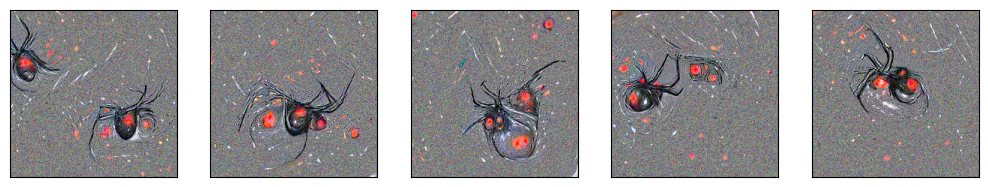

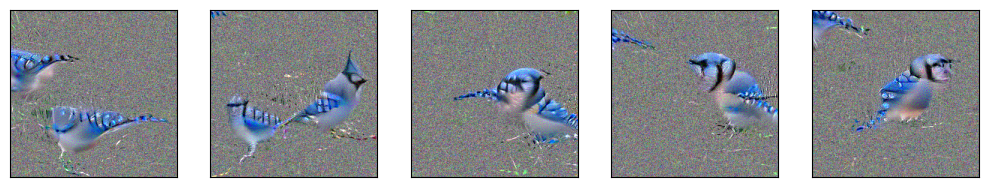

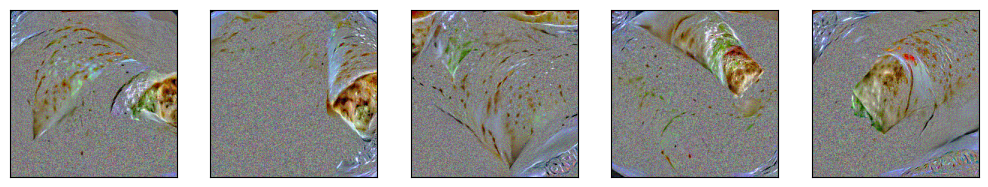

In [5]:
from rai_experiments.utils.visualizations import show_image_row

NIMGS = 5
imgs = tr.randn([NIMGS, 3, 224, 224])
imgs = imgs - imgs.min()
imgs = imgs / imgs.max()

if tr.cuda.is_available():
    model = model.to("cuda")
    imgs = imgs.to("cuda")

for tgt in [75, 17, 965]:
    target = tr.tensor([tgt] * NIMGS)

    if tr.cuda.is_available():
        target = target.to("cuda")

    img_adv, _ = gradient_ascent(
        model=model,
        data=imgs,
        target=target,
        optimizer=L1qFrankWolfe,
        lr=1.0,
        epsilon=20 * (3 * 224 * 224) ** 0.5,
        q=0.975,
        dq=0.05,
        steps=45,
        targeted=True,
    )
    show_image_row([img_adv.detach().cpu().clamp_(0, 1)])